<a href="https://colab.research.google.com/github/Tapishi/Pattern-Separation-using-Logistic-Regressions/blob/main/Logistic_Regression_(Regularisation).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def sigmoid(z):
  return 1/(1 + np.exp(-z))

In [ ]:
## dataset
n=100
m=100
beta_true = np.array([1, 0.5, -0.5] + [0]*(n - 3))
print(beta_true.shape)
a=np.random.random(1)
X = (np.random.random((m, n))-0.5 )*10
Y = np.round(sigmoid(X@beta_true+a  + np.random.randn(m)*0.5))

X_test = (np.random.random((2*m, n))-0.5 )*10
Y_test = np.round(sigmoid(X_test @ beta_true +a+ np.random.randn(2*m)*0.5))

(100,)


In [ ]:

def error(scores, labels):
  scores[scores > 0] = 1
  scores[scores <= 0] = 0
  return np.sum(np.abs(scores - labels)) / float(np.size(labels))

In [ ]:
beta=cp.Variable((n))
b=cp.Variable(1)
log_likelihood = cp.sum(cp.multiply(Y, X @ beta+b) - cp.logistic(X @ beta+b))
problem = cp.Problem(cp.Maximize(log_likelihood/m ))
problem.solve()
beta=beta.value
b=b.value

train_error_lm = error( (X @ beta+b), Y)
test_error_lm = error( (X_test @ beta+b), Y_test)

In [ ]:
print(train_error_lm)
print(test_error_lm)

0.0
0.37


In case of High Dimensional data, the training error is very low but the test error is significatnly higher which is an indicaiton of over fitting.

Using Regularisation

In [ ]:
beta = cp.Variable(n)
b=cp.Variable(1)
log_likelihood = cp.sum(cp.multiply(Y, X @ beta+b) - cp.logistic(X @ beta+b))
intervals=100
train_error = []
test_error = []
lambda_vals = np.logspace(-2, 5, intervals)
beta_vals = []
b_vals=[]
for i in range(intervals):
    lamb=lambda_vals
    obj=cp.Maximize(log_likelihood/m - lamb[i] * cp.norm(beta, 1))
    problem = cp.Problem(obj)
    problem.solve()
    train_error.append(error( (X @ beta+b).value, Y))
    test_error.append(error( (X_test @ beta+b).value, Y_test))
    beta_vals.append(beta.value)
    b_vals.append(b.value)

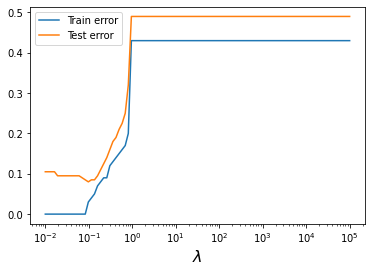

In [ ]:
plt.plot(lambda_vals, train_error, label="Train error")
plt.plot(lambda_vals, test_error, label="Test error")
plt.xscale("log")
plt.legend(loc="upper left")
plt.xlabel(r"$\lambda$", fontsize=16)
plt.show()

In [ ]:
t=test_error
aa=t.index(min(t))
print(lambda_vals[aa])
print(aa)

0.09770099572992251
14


In [ ]:
print(train_error[aa])
print(test_error[aa])

0.03
0.08


In [ ]:
normbeta=[]
l=[]
for j in range(0,len(beta_vals)):
  normbeta.append(np.sqrt((np.linalg.norm(beta_true-beta_vals[j]))**2+(a-b_vals[j])**2))
  l.append(j)

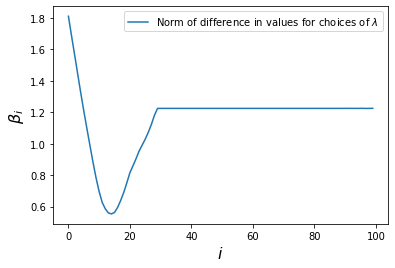

In [ ]:
plt.plot(l,normbeta, label=r"Norm of difference in values for choices of $\lambda$")
plt.xlabel(r"$i$", fontsize=16)
plt.ylabel(r"$\beta_i$", fontsize=16)
plt.legend(loc="upper right")
plt.show()

The above is a reasonable choice for lambda as it minimises the test error